In [3]:
!pip install -r requirements.txt

     ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
     --------- --------------------------- 41.0/152.1 kB 991.0 kB/s eta 0:00:01
     --------------- ----------------------- 61.4/152.1 kB 1.1 MB/s eta 0:00:01
     ---------------------- -------------- 92.2/152.1 kB 751.6 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/152.1 kB 751.6 kB/s eta 0:00:01
     --------------------------------- -- 143.4/152.1 kB 610.6 kB/s eta 0:00:01
     ------------------------------------ 152.1/152.1 kB 606.2 kB/s eta 0:00:00


In [ ]:
# importing some useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pickle

: 

In [21]:
# Loading the dataset
df= pd.read_csv("phishing_site_urls.csv")

In [22]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [24]:
df.shape

(549346, 2)

### About data
#### It consist 549346 rows and 2 columns .The first column consist of links of website and the second column states whether the site is good or bad(phishing)

In [25]:
df.isnull().sum()

URL      0
Label    0
dtype: int64

<Axes: xlabel='Label', ylabel='count'>

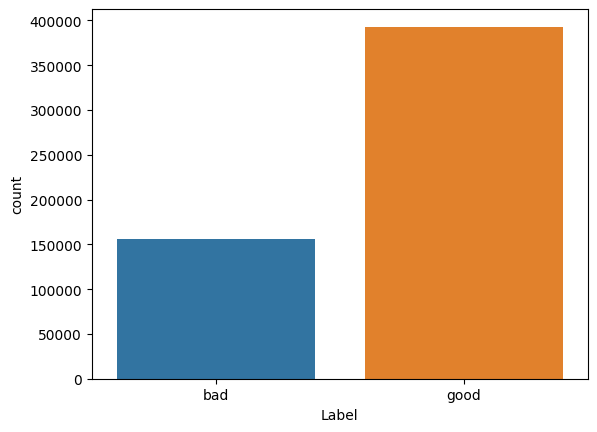

In [26]:
sns.countplot(x="Label",data=df)

### PREPROCESSING

In [27]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [28]:
tokenizer.tokenize(df.URL[0]) # this will fetch all the words from the first URL

['nobell',
 'it',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'login',
 'SkyPe',
 'com',
 'en',
 'cgi',
 'bin',
 'verification',
 'login',
 'ffb',
 'd',
 'dca',
 'cce',
 'f',
 'index',
 'php',
 'cmd',
 'profile',
 'ach',
 'outdated',
 'page',
 'tmpl',
 'p',
 'gen',
 'failed',
 'to',
 'load',
 'nav',
 'login',
 'access']

In [29]:
# Tokenizing all the rows
print('Getting words tokenized ...')
t0= time.perf_counter()
df['text_tokenized'] = df.URL.map(lambda t: tokenizer.tokenize(t))
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 9.714869183000019 sec


In [30]:
df.sample(5)

,URL,Label,text_tokenized
471122,youtube.com/watch?v=4UYYLRY3yks,good,"[youtube, com, watch, v, UYYLRY, yks]"
217814,music.yahoo.com/chris-brown/albums/i-can-trans...,good,"[music, yahoo, com, chris, brown, albums, i, c..."
65876,faqs.org/faqs/mail/addressing/,good,"[faqs, org, faqs, mail, addressing]"
436846,spokeo.com/Joseph+Archambault,good,"[spokeo, com, Joseph, Archambault]"
388158,metrodemontreal.com/art/hebert/metro.html,good,"[metrodemontreal, com, art, hebert, metro, html]"


### SnowballStemmer
#### Snowball is a small string processing language that gives the root words

In [31]:
stemmer = SnowballStemmer("english") # choose a language

In [32]:
# Getting all the stemmed words
print('Getting words stemmed ...')
t0= time.perf_counter()
df['text_stemmed'] = df['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 52.318265672999985 sec


In [33]:
df.sample(5)

,URL,Label,text_tokenized,text_stemmed
272222,allnewyorktours.com/,good,"[allnewyorktours, com]","[allnewyorktour, com]"
135585,i-abra.com/wp-content/themes/nuzi/assets/index...,bad,"[i, abra, com, wp, content, themes, nuzi, asse...","[i, abra, com, wp, content, theme, nuzi, asset..."
288743,baseball-statistics.com/Ballparks/Oak/index.htm,good,"[baseball, statistics, com, Ballparks, Oak, in...","[basebal, statist, com, ballpark, oak, index, ..."
39136,hd73i.0fees.net/login.paypal.com.co.uk.cgi-bin...,bad,"[hd, i, fees, net, login, paypal, com, co, uk,...","[hd, i, fee, net, login, paypal, com, co, uk, ..."
142573,answers.yahoo.com/question/index?qid=200609300...,good,"[answers, yahoo, com, question, index, qid, AA...","[answer, yahoo, com, question, index, qid, aaq..."


In [34]:
# Joining all the stemmmed words.
print('Get joiningwords ...')
t0= time.perf_counter()
df['text_sent'] = df['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Get joiningwords ...
Time taken 0.26613675999999487 sec


In [35]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [36]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


In [37]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
18231,esxcc.com/js/index.htm?us.battle.net/noghn/en/...,good,"[esxcc, com, js, index, htm, us, battle, net, ...","[esxcc, com, js, index, htm, us, battl, net, n...",esxcc com js index htm us battl net noghn en r...
18232,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,good,"[www, eira, nvinip, ncH, wV, yDaH, yE, u, rT, ...","[www, eira, nvinip, nch, wv, ydah, ye, u, rt, ...",www eira nvinip nch wv ydah ye u rt u g m i xz...
18233,'www.institutocgr.coo/web/media/syqvem/dk-óij...,good,"[www, institutocgr, coo, web, media, syqvem, d...","[www, institutocgr, coo, web, media, syqvem, d...",www institutocgr coo web media syqvem dk ij r ...
18234,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,good,"[Y, ko, D, l, qt]","[y, ko, d, l, qt]",y ko d l qt
18236,ruta89fm.com/images/AS@Vies/1i75cf7b16vc<Fd16...,good,"[ruta, fm, com, images, AS, Vies, i, cf, b, vc...","[ruta, fm, com, imag, as, vie, i, cf, b, vc, f...",ruta fm com imag as vie i cf b vc f d b g sd v...


In [38]:
df.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...


## Creating Model
### CountVectorizer- Convert a collection of text documents to a matrix of token counts

In [39]:
cv = CountVectorizer()

In [40]:
feature = cv.fit_transform(df.text_sent) #transform all text which we tokenize and stemed

In [41]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
from sklearn.model_selection import train_test_split


In [43]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label, test_size=0.2)

In [44]:
from sklearn.linear_model import LogisticRegression


In [45]:
lr = LogisticRegression()
lr.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
lr.score(testX,testY)

0.9643396741603714

In [47]:
Scores_ml = {}
Scores_ml['Logistic Regression'] = np.round(lr.score(testX,testY),2)

Training Accuracy : 0.9776324531942586
Testing Accuracy : 0.9643396741603714

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.91      0.97      0.94     29223
        Good       0.99      0.96      0.98     80647

    accuracy                           0.96    109870
   macro avg       0.95      0.96      0.96    109870
weighted avg       0.97      0.96      0.96    109870


CONFUSION MATRIX


<Axes: >

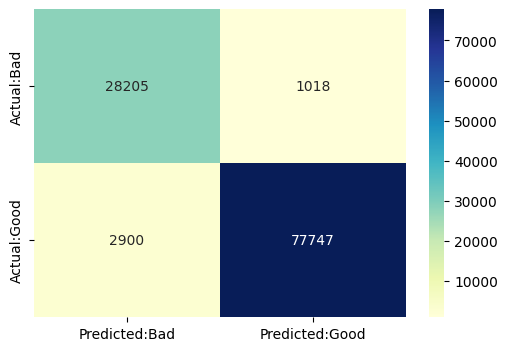

In [48]:
# creating confusing matrix
print('Training Accuracy :',lr.score(trainX,trainY))
print('Testing Accuracy :',lr.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(lr.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [49]:
from sklearn.naive_bayes import MultinomialNB


In [50]:
# create mnb object
mnb = MultinomialNB()

In [51]:
mnb.fit(trainX,trainY)

MultinomialNB()

In [52]:
mnb.score(testX,testY)

0.9589605897879312

In [53]:
Scores_ml['MultinomialNB'] = np.round(mnb.score(testX,testY),2)

Training Accuracy : 0.9742693571435073
Testing Accuracy : 0.9589605897879312

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.94      0.93     30478
        Good       0.98      0.97      0.97     79392

    accuracy                           0.96    109870
   macro avg       0.95      0.95      0.95    109870
weighted avg       0.96      0.96      0.96    109870


CONFUSION MATRIX


<Axes: >

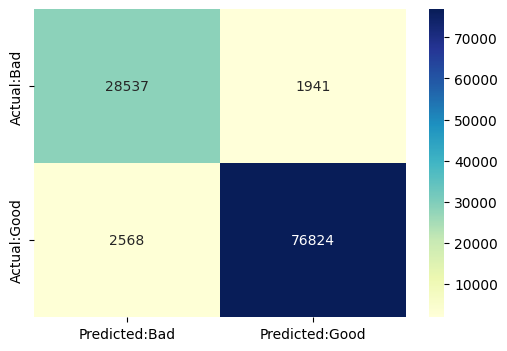

In [54]:
print('Training Accuracy :',mnb.score(trainX,trainY))
print('Testing Accuracy :',mnb.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [55]:
pipeline_ls = make_pipeline(CountVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words='english'), LogisticRegression())

In [56]:
trainX, testX, trainY, testY = train_test_split(df.URL, df.Label)

In [57]:
pipeline_ls.fit(trainX,trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [58]:
pipeline_ls.score(testX,testY)

0.9671028200703379

Training Accuracy : 0.9811072088231082
Testing Accuracy : 0.9671028200703379

CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94     37242
        Good       0.99      0.97      0.98    100095

    accuracy                           0.97    137337
   macro avg       0.95      0.97      0.96    137337
weighted avg       0.97      0.97      0.97    137337


CONFUSION MATRIX


<Axes: >

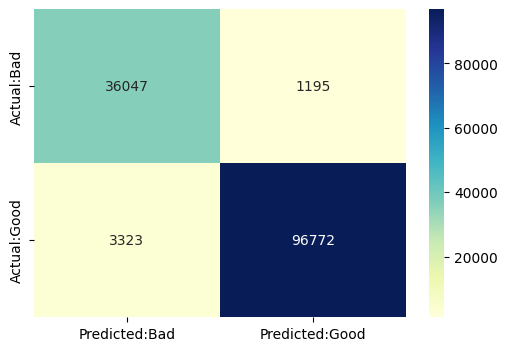

In [59]:
print('Training Accuracy :',pipeline_ls.score(trainX,trainY))
print('Testing Accuracy :',pipeline_ls.score(testX,testY))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(testX), testY),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(testX), testY,
                            target_names =['Bad','Good']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC(gamma="auto")

In [62]:
trainX, testX, trainY, testY = train_test_split(feature, df.Label, test_size=0.2)

In [ ]:
svc.fit(trainX, trainY)
svc.score(trainX, trainY)
y_pred = svc.predict(testX)


In [ ]:
from sklearn.matrics import f1_score

f1_score(testY, y_pred)

In [ ]:
dt.fit(trainX, trainY)

In [ ]:
rf.fit(trainX, trainY)